In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/FGA/Churntrain.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df.describe(include='all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,100.236235,NaN,NaN,NaN,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,NaN
std,NaN,39.698401,NaN,NaN,NaN,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


EDA

In [6]:
df['churn'].value_counts()/len(df)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

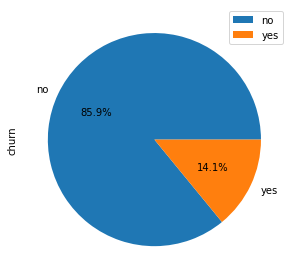

In [7]:
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', legend=True)
plt.tight_layout()
#plt.show()

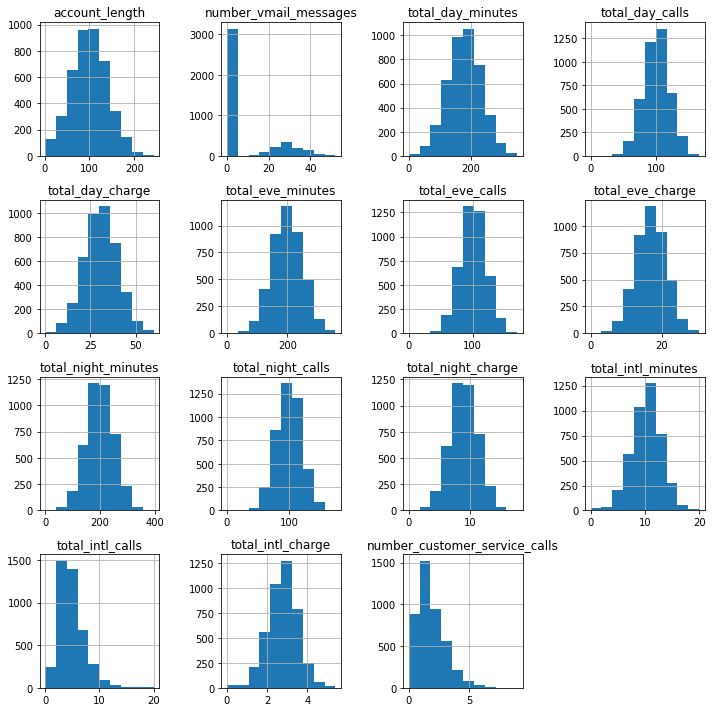

In [8]:
df.hist(figsize=(10,10), bins=10)
plt.tight_layout()

In [9]:
churnbyarea = df.groupby('area_code')['churn'].value_counts(normalize=True).to_frame()
churnbyarea.columns = ['Proportion']
churnbyarea.reset_index(inplace=True)

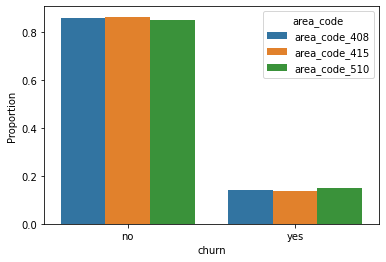

In [10]:
sns.barplot(data=churnbyarea, hue='area_code', x='churn', y='Proportion')

In [11]:
churnbyarea

,area_code,churn,Proportion
0,area_code_408,no,0.860037
1,area_code_408,yes,0.139963
2,area_code_415,no,0.863852
3,area_code_415,yes,0.136148
4,area_code_510,no,0.849432
5,area_code_510,yes,0.150568


In [12]:
churnbyvm = df.groupby('voice_mail_plan')['churn'].value_counts(normalize=True).to_frame()
churnbyvm.columns = ['Proportion']
churnbyvm.reset_index(inplace=True)

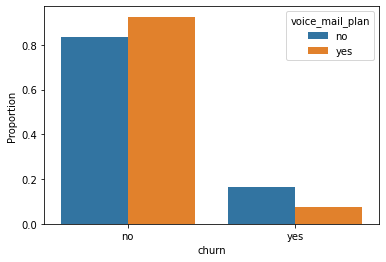

In [13]:
sns.barplot(data=churnbyvm, hue='voice_mail_plan', x='churn', y='Proportion')

In [18]:
#df.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

Preprocessing

In [15]:
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [16]:
#identifikasi missing values
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [17]:
#identifikasi duplikasi data
df.duplicated().value_counts()

False    4250
dtype: int64

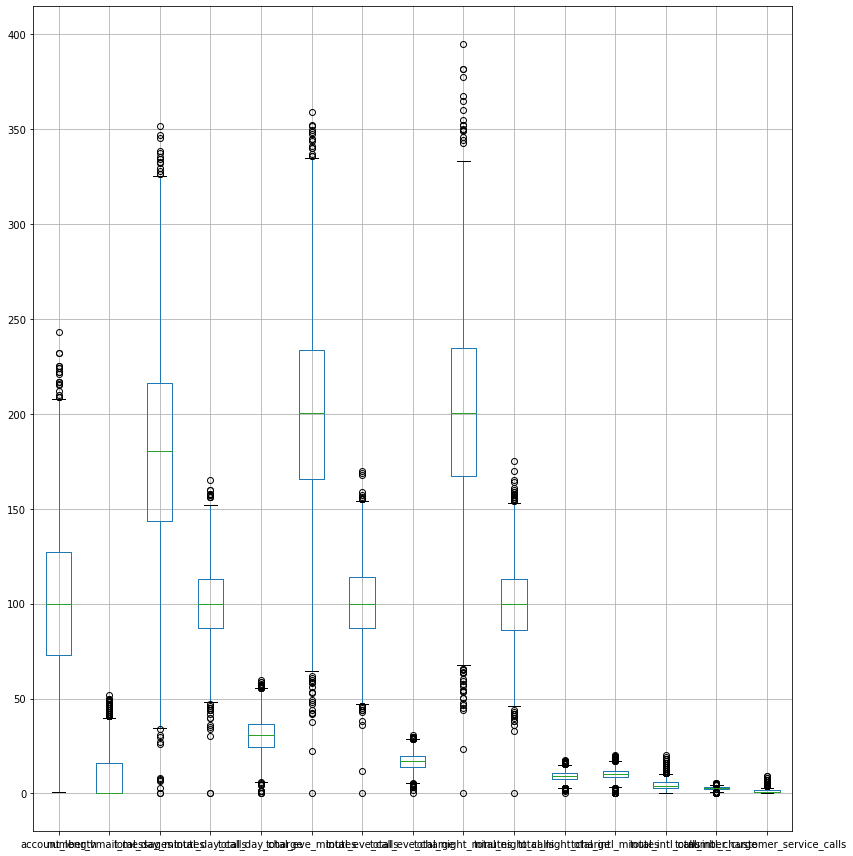

In [18]:
#deteksi outlier
df.boxplot(figsize=(12,12))
plt.tight_layout()

In [19]:
Q1 = (df[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 
          'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
          'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
          'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]).quantile(0.25)
Q3 = (df[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 
          'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
          'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
          'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]).quantile(0.75)
IQR = Q3-Q1
maxi = Q3+(1.5*IQR)
print(maxi)
mini = Q1-(1.5*IQR)
print()
print(mini)
more = (df > maxi)
low = (df < mini)
df = df.mask(more, maxi, axis=1)
df = df.mask(low, mini, axis=1)
#print(df[['account_length']].describe())

account_length                   208.00000
number_vmail_messages             40.00000
total_day_minutes                325.51250
total_day_calls                  152.00000
total_day_charge                  55.32750
total_eve_minutes                335.55000
total_eve_calls                  154.50000
total_eve_charge                  28.51500
total_night_minutes              335.91250
total_night_calls                153.50000
total_night_charge                15.11625
total_intl_minutes                17.25000
total_intl_calls                  10.50000
total_intl_charge                  4.65000
number_customer_service_calls      3.50000
dtype: float64

account_length                   -8.00000
number_vmail_messages           -24.00000
total_day_minutes                34.01250
total_day_calls                  48.00000
total_day_charge                  5.78750
total_eve_minutes                64.15000
total_eve_calls                  46.50000
total_eve_charge                  5.45500
tot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  app.launch_new_instance()


In [20]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.179529,7.554118,180.281979,99.940235,30.648467,200.217200,100.190118,17.018678,200.504556,99.838941,9.022821,10.271812,4.370588,2.773972,1.474000
std,39.530976,13.234796,53.763629,19.649367,9.139651,49.927189,19.776787,4.243726,49.861498,19.929176,2.243829,2.677155,2.267700,0.722405,1.106675
min,1.000000,0.000000,34.012500,48.000000,5.787500,64.150000,46.500000,5.455000,66.012500,45.500000,2.966250,3.250000,0.000000,0.890000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,208.000000,40.000000,325.512500,152.000000,55.327500,335.550000,154.500000,28.515000,335.912500,153.500000,15.116250,17.250000,10.500000,4.650000,3.500000


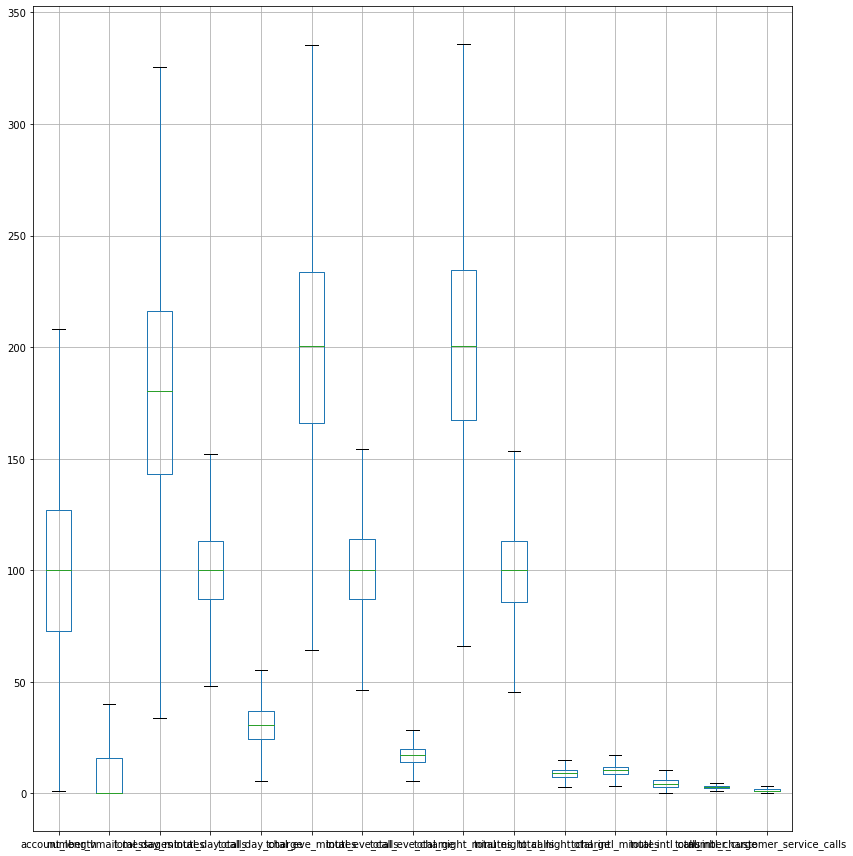

In [21]:
df.boxplot(figsize=(12,12))
plt.tight_layout()

Modelling

In [22]:
df = df.join(pd.get_dummies(df['state'], prefix='state'), how='left')
df = df.join(pd.get_dummies(df['area_code']), how='left')
df = df.join(pd.get_dummies(df['international_plan'], prefix='international_plan'), how='left')
df = df.join(pd.get_dummies(df['voice_mail_plan'], prefix='voice_mail_plan'), how='left')

In [23]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.50,...,0,0,0,0,1,0,1,0,0,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.20,...,0,0,0,0,1,0,1,0,1,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,64.15,...,0,0,0,1,0,0,0,1,1,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.30,...,0,0,0,0,1,0,0,1,1,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,335.55,...,0,0,0,0,0,1,1,0,0,1


In [23]:
df.drop('state', axis=1, inplace=True)
df.drop('area_code', axis=1, inplace=True)
df.drop('international_plan', axis=1, inplace=True)
df.drop('voice_mail_plan', axis=1, inplace=True)

In [30]:
# from sklearn.preprocessing import LabelEncoder
# labelEn = LabelEncoder()
# df['churn'] = labelEn.fit_transform(df['churn'])

In [24]:
df['churn']

0       no
1       no
2       no
3       no
4       no
        ..
4245    no
4246    no
4247    no
4248    no
4249    no
Name: churn, Length: 4250, dtype: object

In [25]:
X = df.drop('churn', axis=1)
y = df['churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=7)

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
model_lr.score(X_test, y_test)

0.8579492003762935

In [29]:
pred_lr = model_lr.predict(X_test)
print(pred_lr)

['no' 'no' 'no' ... 'no' 'no' 'no']


In [30]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, pred_lr))
print("accuracy: ", accuracy_score(y_test, pred_lr))

              precision    recall  f1-score   support

          no       0.87      0.98      0.92       913
         yes       0.48      0.09      0.16       150

    accuracy                           0.86      1063
   macro avg       0.68      0.54      0.54      1063
weighted avg       0.81      0.86      0.81      1063

accuracy:  0.8579492003762935


KNearest Neighbor

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
model_knn.score(X_test, y_test)

0.8852304797742239

In [33]:
pred_knn = model_knn.predict(X_test)
print(pred_knn)

['no' 'no' 'no' ... 'no' 'no' 'no']


In [34]:
print(classification_report(y_test, pred_knn))
print("accuracy: ", accuracy_score(y_test, pred_knn))

              precision    recall  f1-score   support

          no       0.89      0.98      0.94       913
         yes       0.74      0.29      0.41       150

    accuracy                           0.89      1063
   macro avg       0.82      0.64      0.67      1063
weighted avg       0.87      0.89      0.86      1063

accuracy:  0.8852304797742239


Prediksi data test

In [35]:
df_test = pd.read_csv('/content/drive/MyDrive/FGA/Churntest.csv')
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [37]:
df_test = df_test.join(pd.get_dummies(df_test['state'], prefix='state'), how='left')
df_test = df_test.join(pd.get_dummies(df_test['area_code']), how='left')
df_test = df_test.join(pd.get_dummies(df_test['international_plan'], prefix='international_plan'), how='left')
df_test = df_test.join(pd.get_dummies(df_test['voice_mail_plan'], prefix='voice_mail_plan'), how='left')

In [38]:
df_test.drop('id', axis=1, inplace=True)
df_test.drop('state', axis=1, inplace=True)
df_test.drop('area_code', axis=1, inplace=True)
df_test.drop('international_plan', axis=1, inplace=True)
df_test.drop('voice_mail_plan', axis=1, inplace=True)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    int64  
 1   number_vmail_messages          750 non-null    int64  
 2   total_day_minutes              750 non-null    float64
 3   total_day_calls                750 non-null    int64  
 4   total_day_charge               750 non-null    float64
 5   total_eve_minutes              750 non-null    float64
 6   total_eve_calls                750 non-null    int64  
 7   total_eve_charge               750 non-null    float64
 8   total_night_minutes            750 non-null    float64
 9   total_night_calls              750 non-null    int64  
 10  total_night_charge             750 non-null    float64
 11  total_intl_minutes             750 non-null    float64
 12  total_intl_calls               750 non-null    int

In [40]:
model_lr.predict(df_test)

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes

In [41]:
model_knn.predict(df_test)

array(['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no',

In [42]:
predicted_lr = model_lr.predict(df_test)
predicted_knn = model_knn.predict(df_test)

In [43]:
df_test['churn'] = predicted_lr
df_test['churn']

0      no
1      no
2      no
3      no
4      no
       ..
745    no
746    no
747    no
748    no
749    no
Name: churn, Length: 750, dtype: object

In [44]:
df_test['churn'].value_counts()

no     723
yes     27
Name: churn, dtype: int64

In [46]:
df_test['churn'] = predicted_knn
df_test['churn']

0      yes
1       no
2       no
3       no
4       no
      ... 
745     no
746     no
747     no
748     no
749     no
Name: churn, Length: 750, dtype: object

In [47]:
df_test['churn'].value_counts()

no     703
yes     47
Name: churn, dtype: int64